In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_palette("colorblind")

%matplotlib inline

In [3]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(int)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['worldwide_gross'] * 100

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,84.692106
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,60.733080
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-133.703598
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,76.436443
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,75.925058
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-1.000000,-inf
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500,97.505146
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400,-273.692078
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1.000000,-inf


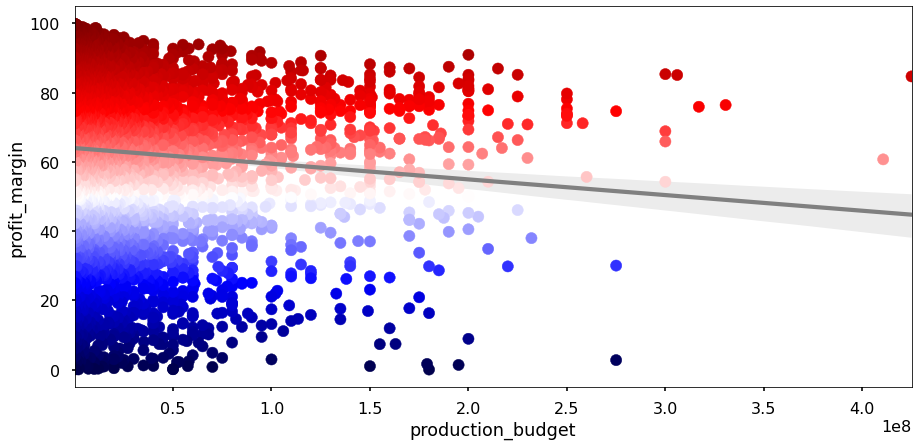

In [4]:
fig, ax = plt.subplots(figsize = (15,7))
profitable_movies = tn_movie_budgets.loc[tn_movie_budgets['profit_margin'] >= 0]


ax = sns.regplot(x ='production_budget', y = 'profit_margin', data = profitable_movies, scatter = False, color = 'grey')
ax.scatter(profitable_movies['production_budget'], profitable_movies['profit_margin'], c = profitable_movies["profit_margin"],  cmap="seismic")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,60.733080
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,76.436443
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,75.925058
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,2.211401,68.860947
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,1.186484,54.264473
...,...,...,...,...,...,...,...,...,...
5687,88,"Feb 6, 2004",The Lost Skeleton of Cadavra,100000,110536,110536,10536,0.105360,9.531736
5700,1,"May 30, 2008",The Foot Fist Way,79000,234286,234286,155286,1.965646,66.280529
5737,38,"Mar 18, 2016",Krisha,30000,144822,144822,114822,3.827400,79.284915
5738,39,"Sep 1, 2006",Mutual Appreciation,30000,103509,103509,73509,2.450300,71.017013


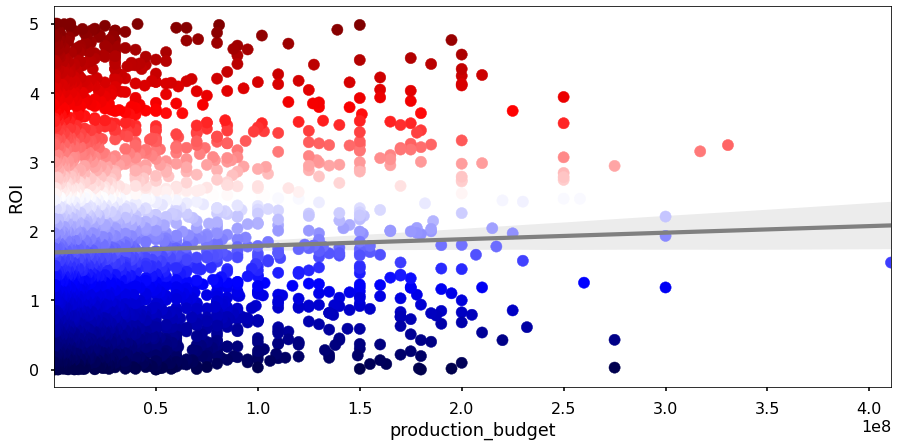

In [11]:
fig, ax = plt.subplots(figsize = (15,7))
profitable_movies_roi = tn_movie_budgets.loc[tn_movie_budgets['ROI'].between(0, 5)]
display(profitable_movies_roi)
ax = sns.regplot(x ='production_budget', y = 'ROI', data = profitable_movies_roi, scatter = False, color = 'grey')
ax.scatter(profitable_movies_roi['production_budget'], profitable_movies_roi['ROI'], c = profitable_movies_roi["ROI"],  cmap="seismic")

In [65]:
rtcurrent = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')
rtcurrent

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,20th Century Fox,Rotten
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,Sony Pictures Classics,Certified-Fresh
2,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,Waner Bros.,Fresh
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,Criterion Collection,Certified-Fresh
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,Disney,Fresh
...,...,...,...,...,...,...,...,...,...,...
17707,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,MCA Universal Home Video,Rotten
17708,Zootopia,From the largest elephant to the smallest shre...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",3/4/2016,Walt Disney Animation Studios,Certified-Fresh
17709,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,Fox,Fresh
17710,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,Paramount Pictures,Fresh
